🎯 Vicenne Investment Strategy Summary

📊 DCF Estimated Price     : 183 MAD/share
🎲 Monte Carlo Mean        : 119 MAD/share
📉 10th Percentile         : 88 MAD
📈 90th Percentile         : 155 MAD

💰 Key Price Zones:
🟢 BUY ZONE               : 236 MAD
🟡 PARTIAL SELL TARGET    : ~378 MAD (+60%)
🔴 FULL SELL TARGET       : ~519 MAD (+112%)
🔄 RE-ENTRY ZONE          : <156 MAD

📌 Recommendation         : ⚖️ HOLD


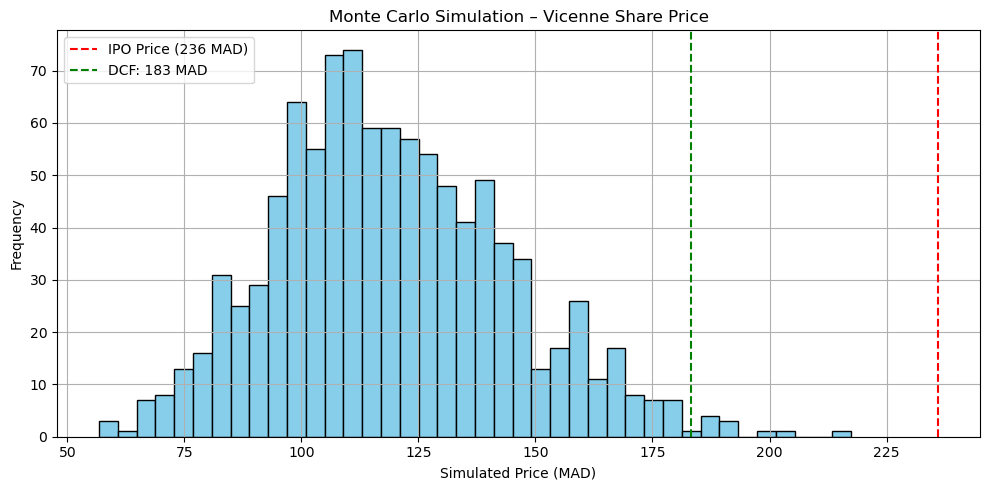

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === INPUTS ===
ipo_price = 236
shares_outstanding = 10_258_850
discount_rate = 0.12
terminal_growth = 0.02
net_income_forecast = [117, 149, 153, 185, 200, 232]  # 2025–2030 in million MAD

# === DCF Valuation ===
years = range(1, len(net_income_forecast) + 1)
dcf_values = [ni * 1e6 / ((1 + discount_rate) ** y) for ni, y in zip(net_income_forecast, years)]
terminal_value = (net_income_forecast[-1] * 1e6 * (1 + terminal_growth)) / (discount_rate - terminal_growth)
terminal_value_discounted = terminal_value / ((1 + discount_rate) ** years[-1])
equity_value_dcf = sum(dcf_values) + terminal_value_discounted
price_per_share_dcf = equity_value_dcf / shares_outstanding

# === Monte Carlo Simulation ===
np.random.seed(42)
simulations = 1000
initial_rev_2024 = 837  # mMAD
growth_mean, growth_std = 0.12, 0.03
margin_mean, margin_std = 0.14, 0.02

simulated_prices = []
for _ in range(simulations):
    g = np.random.normal(growth_mean, growth_std)
    m = np.clip(np.random.normal(margin_mean, margin_std), 0.08, 0.20)
    final_rev = initial_rev_2024 * (1 + g)**6
    net_income = final_rev * m
    term_val = (net_income * (1 + terminal_growth)) / (discount_rate - terminal_growth)
    term_val_disc = term_val / ((1 + discount_rate)**6)
    price = (term_val_disc * 1e6) / shares_outstanding
    simulated_prices.append(price)

mean_simulated_price = np.mean(simulated_prices)
p10, p90 = np.percentile(simulated_prices, [10, 90])

# === Price Zones & Verdict ===
buy_zone = ipo_price
partial_sell_zone = round(1.6 * buy_zone)
full_sell_zone = round(2.2 * buy_zone)
reentry_zone = round(0.85 * price_per_share_dcf)
verdict = "✅ BUY" if price_per_share_dcf > ipo_price and mean_simulated_price > ipo_price else "⚖️ HOLD"

# === Output Summary ===
print("🎯 Vicenne Investment Strategy Summary\n")
print(f"📊 DCF Estimated Price     : {price_per_share_dcf:.0f} MAD/share")
print(f"🎲 Monte Carlo Mean        : {mean_simulated_price:.0f} MAD/share")
print(f"📉 10th Percentile         : {p10:.0f} MAD")
print(f"📈 90th Percentile         : {p90:.0f} MAD\n")
print("💰 Key Price Zones:")
print(f"🟢 BUY ZONE               : {buy_zone} MAD")
print(f"🟡 PARTIAL SELL TARGET    : ~{partial_sell_zone} MAD (+60%)")
print(f"🔴 FULL SELL TARGET       : ~{full_sell_zone} MAD (+112%)")
print(f"🔄 RE-ENTRY ZONE          : <{reentry_zone} MAD")
print(f"\n📌 Recommendation         : {verdict}")

# === Chart ===
plt.figure(figsize=(10, 5))
plt.hist(simulated_prices, bins=40, color='skyblue', edgecolor='black')
plt.axvline(ipo_price, color='red', linestyle='--', label="IPO Price (236 MAD)")
plt.axvline(price_per_share_dcf, color='green', linestyle='--', label=f"DCF: {price_per_share_dcf:.0f} MAD")
plt.title("Monte Carlo Simulation – Vicenne Share Price")
plt.xlabel("Simulated Price (MAD)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
